In [ ]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=330c642dcd13bd7b286e105e9f28157f41f656da1b06b61ebd671490f778ae31
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [ ]:
#linguistic variables
temperature = ctrl.Antecedent(np.arange(70, 100, 1), 'temperature')
fan_speed = ctrl.Consequent(np.arange(0, 150, 1), 'fan_speed')

#membership functions
temperature['risky'] = fuzz.trimf(temperature.universe, [0, 40, 80])
temperature['average'] = fuzz.trimf(temperature.universe, [60, 75, 100])
temperature['excellent'] = fuzz.trimf(temperature.universe, [90, 105, 120])

fan_speed['slow'] = fuzz.trimf(fan_speed.universe, [0, 50, 120])
fan_speed['moderate'] = fuzz.trimf(fan_speed.universe, [80, 100, 150])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [100, 200, 300])

#rules
rule1 = ctrl.Rule(temperature['risky'], fan_speed['slow'])
rule2 = ctrl.Rule(temperature['average'], fan_speed['moderate'])
rule3 = ctrl.Rule(temperature['excellent'], fan_speed['high'])


fan_speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

fan_speed_sim = ctrl.ControlSystemSimulation(fan_speed_ctrl)


input_temperature = 60
fan_speed_sim.input['temperature'] = input_temperature
fan_speed_sim.compute()

computed_fan_speed = fan_speed_sim.output['fan_speed']

print(f"Input Temperature: {input_temperature}°F")
print(f"IF TEMPERATURE is {input_temperature}, THEN increase furnace FAN-SPEED to {computed_fan_speed} RPM")


Input Temperature: 60°F
IF TEMPERATURE is 60, THEN increase furnace FAN-SPEED to 85.5438029632665 RPM


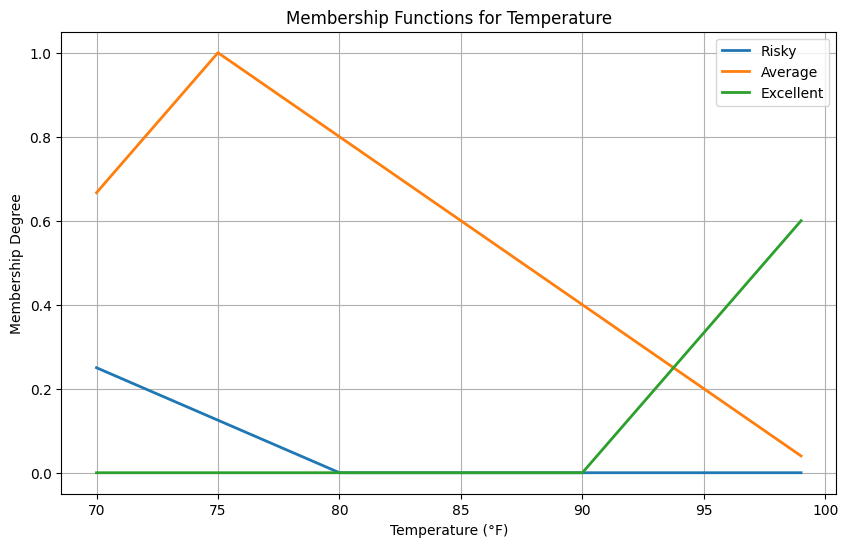

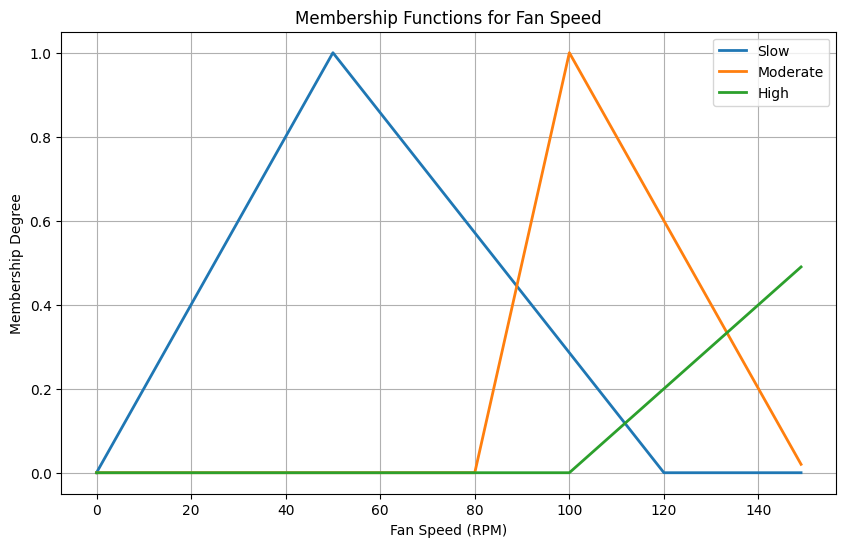

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(temperature.universe, fuzz.trimf(temperature.universe, [0, 40, 80]), label='Risky', linewidth=2)
plt.plot(temperature.universe, fuzz.trimf(temperature.universe, [60, 75, 100]), label='Average', linewidth=2)
plt.plot(temperature.universe, fuzz.trimf(temperature.universe, [90, 105, 120]), label='Excellent', linewidth=2)

plt.title('Membership Functions for Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)

plt.show()

#fan_speed
plt.figure(figsize=(10, 6))

plt.plot(fan_speed.universe, fuzz.trimf(fan_speed.universe, [0, 50, 120]), label='Slow', linewidth=2)
plt.plot(fan_speed.universe, fuzz.trimf(fan_speed.universe, [80, 100, 150]), label='Moderate', linewidth=2)
plt.plot(fan_speed.universe, fuzz.trimf(fan_speed.universe, [100, 200, 300]), label='High', linewidth=2)

plt.title('Membership Functions for Fan Speed')
plt.xlabel('Fan Speed (RPM)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)

plt.show()
